

                                                    Final Project
Project Overview:

The purpose of this project is to investigate the determinants of the stock market. Investors often trade based on their expectation of the future economy as well as their amount of liquidity. Therefore, we have selected three macroeconomic variables -- unemployment rate, federal funds rate, and total industrial production -- to study the scope of their impact on the stock market, which we use the major index S&P 500 to represent. We believe that unemployment and higher interest rate will decrease investors' buying power, leading to a poorly performing stock market. Meanwhile an increase in industrial production indicates an expanding economy, driving up the S&P 500 index. To test this theory, we will implement a linear regression model using monthly data from  January 1955 to September 2020.



Project Structure:

This project consists of the following three sections:

1. Introduction of the key variables and the method used to access data from the source
2. Summary statistics and visualizations of each variable
3. Revisiting the hypothesis and performing a linear regression model to test, followed by a conclusion present our final results

Data Report: 

The data for this project is from the Federal Reserve Economic Data website (FRED) and Yahoo Finance. FRED provides monthly data on the U.S. unemployment rate, Federal Funds Rate (which impact the interest rate charged to consumers), and Industrial Production Total Index, while Yahoo Finance provides monthly data on S&P 500 from January 1955 to September 2020. The data can be accessed at https://fred.stlouisfed.org and https://finance.yahoo.com/.


Key Variables: 

The four key variables in this project are unemployment rate, effective federal funds rate, total industrial production: total index, and S&P 500 index.

FRED defines the unemployment rate as to "represent the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces".

The effective federal funds rate (EFFR) is calculated as a volume-weighted median of overnight federal funds transactions reported in the FR 2420 Report of Selected Money Market Rates. 

FRED defines the Industrial Production: Total Index (INDPRO) as "an economic indicator that measures real output for all facilities located in the United States manufacturing, mining, and electric, and gas utilities (excluding those in U.S. territories)".

FRED defines "the observation for the S&P 500 index represents the daily index value at market close. The market typically closes at 4 PM ET, except for holidays when it sometimes closes early.The S&P 500 is regarded as a gauge of the large cap U.S. equities market. The index includes 500 leading companies in leading industries of the U.S. economy, which are publicly held on either the NYSE or NASDAQ, and covers 75% of U.S. equities. Since this is a price index and not a total return index, the S&P 500 index here does not contain dividends".


In [196]:
#KEY IMPORTS

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

ACCESSING THE DATA, SUMMARY STATISTICS, & DATA VISUALIZATIONS

<h2>Unemployment Rate

In [197]:
# UNEMPLOYMENT RATE

url_ur = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1955-01-01&coed=2020-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-12&revision_date=2020-11-12&nd=1948-01-01'
data_ur = pd.read_csv(url_ur, parse_dates=True)
data_ur.columns = ['DATE','UNRATE']
data_ur.head()

,DATE,UNRATE
0,1955-01-01,4.9
1,1955-02-01,4.7
2,1955-03-01,4.6
3,1955-04-01,4.7
4,1955-05-01,4.3


In [198]:
# UNEMPLOYMENT RATE: SUMMARY STATISTICS

data_ur.describe()

,UNRATE
count,789.000000
mean,5.922814
std,1.664899
min,3.400000
25%,4.700000
50%,5.600000
75%,7.000000
max,14.700000


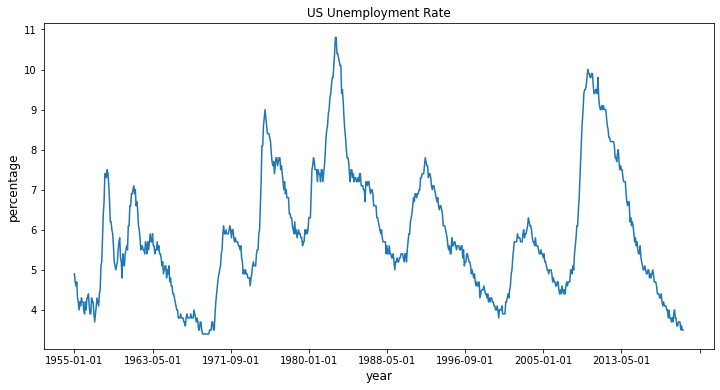

In [199]:
# UNEMPLOYMENT RATE: DATA VISUALIZATION

data_ur1 = data_ur.set_index('DATE')
ax = data_ur1['1955':'2020'].plot(title='US Unemployment Rate', legend = False, figsize = (12,6))
ax.set_xlabel('year', fontsize = 12)
ax.set_ylabel('percentage', fontsize = 12)
plt.show()

<h2>Federal Funds Rate

In [200]:
# FEDERAL FUNDS RATE 
url_ffr = 'http://research.stlouisfed.org/fred2/series/FEDFUNDS/downloaddata/FEDFUNDS.csv'
data_ffr = pd.read_csv(url_ffr, parse_dates=True)
data_ffr.columns=['DATE', 'FFR']
data_ffr.head()

,DATE,FFR
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [201]:
# FEDERAL FUNDS RATE: SUMMARY STATISTICS
data_ffr.describe()

,FFR
count,797.000000
mean,4.712986
std,3.605116
min,0.050000
25%,1.980000
50%,4.290000
75%,6.500000
max,19.100000


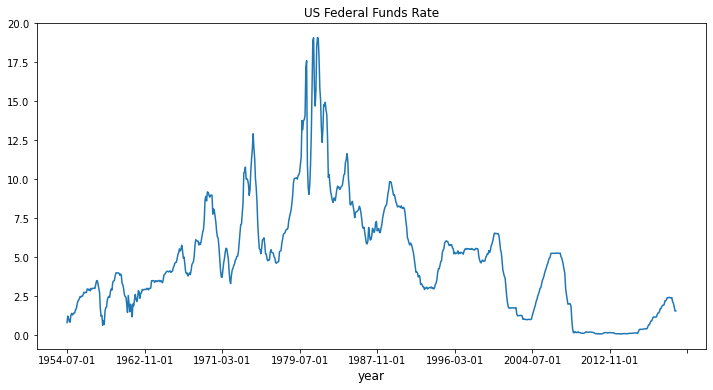

In [202]:
# FEDERAL FUNDS RATE: DATA VISUALIZATION
data_ffr1=data_ffr.set_index('DATE')
ax = data_ffr1['1954':'2020'].plot(title='US Federal Funds Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

<h2>Total Industrial Production

In [203]:
# TOTAL INDUSTRIAL PRODUCTION
url_ip = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=INDPRO&scale=left&cosd=1919-01-01&coed=2020-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-12&revision_date=2020-11-12&nd=1919-01-01'
data_ip = pd.read_csv(url_ip, parse_dates=True)
data_ip.columns=['DATE', 'INDPRO']
data_ip.head()

,DATE,INDPRO
0,1919-01-01,5.0124
1,1919-02-01,4.7908
2,1919-03-01,4.6524
3,1919-04-01,4.7355
4,1919-05-01,4.7632


In [204]:
# TOTAL INDUSTRIAL PRODUCTION: SUMMARY STATISTICS
data_ip.describe()

,INDPRO
count,1221.000000
mean,45.300118
std,34.939827
min,3.793900
25%,13.901800
50%,38.852500
75%,73.421900
max,110.551600


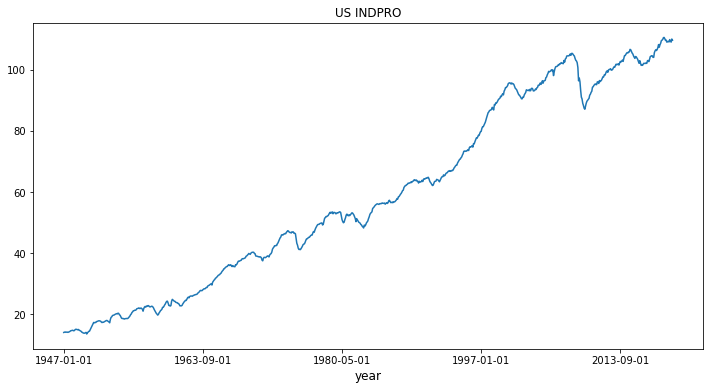

In [205]:
# TOTAL INDUSTRIAL PRODUCTION: DATA VISUALIZATION
data_ip1=data_ip.set_index('DATE')
ax = data_ip1['1947':'2020'].plot(title='US INDPRO', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

<h2>S&P 500

In [206]:
# S&P 500
data_sp = pd.read_csv("^GSPC.csv")
data_sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-01,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-01,17.760000,17.760000,17.260000,17.570000,17.570000,0
2,1928-02-01,17.530001,17.629999,16.950001,17.260000,17.260000,0
3,1928-03-01,17.299999,19.280001,17.299999,19.280001,19.280001,0
4,1928-04-01,18.910000,19.750000,18.910000,19.750000,19.750000,0
...,...,...,...,...,...,...,...
1111,2020-07-01,3105.919922,3279.989990,3101.169922,3271.120117,3271.120117,97197020000
1112,2020-08-01,3288.260010,3514.770020,3284.530029,3500.310059,3500.310059,84402300000
1113,2020-09-01,3507.439941,3588.110107,3209.449951,3363.000000,3363.000000,92084120000
1114,2020-10-01,3385.870117,3549.850098,3233.939941,3269.959961,3269.959961,89737600000


In [207]:
# S&P 500: SUMMARY STATISTICS
data_sp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1.116000e+03
mean,485.579999,502.049544,469.088486,488.537823,488.537823,1.612025e+10
std,726.624844,751.605683,702.379739,731.674360,731.674360,3.068833e+10
min,4.400000,5.120000,4.400000,4.430000,4.430000,0.000000e+00
25%,23.722499,24.365001,23.150000,24.069999,24.069999,2.779000e+07
50%,98.784999,102.229999,95.795002,98.774997,98.774997,3.643450e+08
75%,817.232528,878.432510,773.992493,829.697510,829.697510,1.140654e+10
max,3507.439941,3645.989990,3284.530029,3572.659912,3572.659912,1.618436e+11


In [208]:
data_sp = data_sp.drop(['Open','High','Low','Adj Close','Volume'], axis = 1)
data_sp.columns = ['DATE','S&P 500']
data_sp.head()

,DATE,S&P 500
0,1927-12-01,17.660000
1,1928-01-01,17.570000
2,1928-02-01,17.260000
3,1928-03-01,19.280001
4,1928-04-01,19.750000


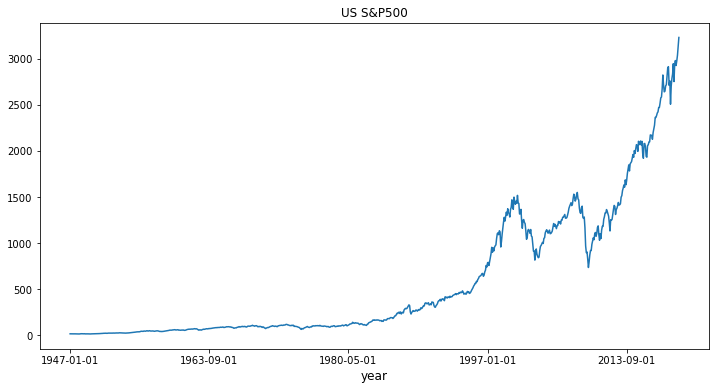

In [209]:
# S&P 500 CLOSING PRICE: DATA VISUALIZATION
data_sp1 = data_sp.set_index('DATE')
ax = data_sp1['1947':'2020'].plot(title='US S&P500', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

<h2>Data Analysis

In [210]:
data_merge_temp1 = pd.merge(data_ur, data_ffr, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge_temp2 = pd.merge(data_merge_temp1, data_ip, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge = pd.merge(data_merge_temp2, data_sp2, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge.head()

,DATE,UNRATE,FFR,INDPRO,S&P 500
0,1955-01-01,4.9,1.39,19.8557,36.630001
1,1955-02-01,4.7,1.29,20.1050,36.759998
2,1955-03-01,4.6,1.35,20.5757,36.580002
3,1955-04-01,4.7,1.43,20.8250,37.959999
4,1955-05-01,4.3,1.43,21.1573,37.910000


In [211]:
data_merge = data_merge.fillna(0)

In [212]:
# COMPUTING THE PERCENTAGE CHANGE OF THE VARIABLES
data_merge['ln_UNRATE'] = np.log(data_merge['UNRATE'])
data_merge['ln_FFR'] = np.log(data_merge['FFR'])
data_merge['ln_INDPRO'] = np.log(data_merge['INDPRO'])
data_merge['ln_S&P 500'] = np.log(data_merge['S&P 500'])
data_merge = data_merge.set_index('DATE')

data_merge.head()

,UNRATE,FFR,INDPRO,S&P 500,ln_UNRATE,ln_FFR,ln_INDPRO,ln_S&P 500
DATE,,,,,,,,
1955-01-01,4.9,1.39,19.8557,36.630001,1.589235,0.329304,2.988491,3.600868
1955-02-01,4.7,1.29,20.1050,36.759998,1.547563,0.254642,3.000969,3.604410
1955-03-01,4.6,1.35,20.5757,36.580002,1.526056,0.300105,3.024111,3.599502
1955-04-01,4.7,1.43,20.8250,37.959999,1.547563,0.357674,3.036154,3.636533
1955-05-01,4.3,1.43,21.1573,37.910000,1.458615,0.357674,3.051985,3.635215


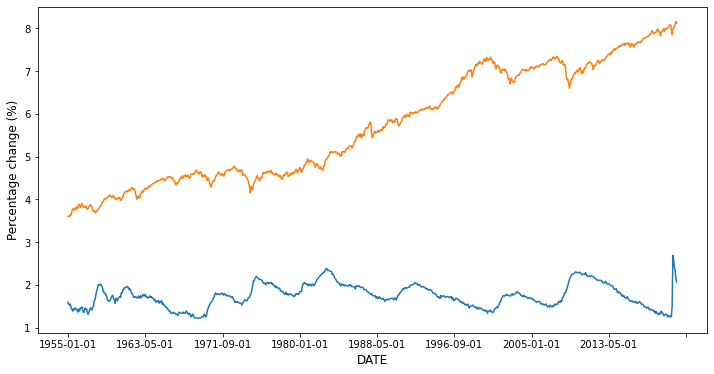

In [213]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('', fontsize = 12)
ax1.set_ylabel('Percentage change (%)', fontsize = 12)
ax1 = data_merge['ln_UNRATE'].plot(figsize = (12,6))
data_merge['ln_S&P 500'].plot(ax = ax1)

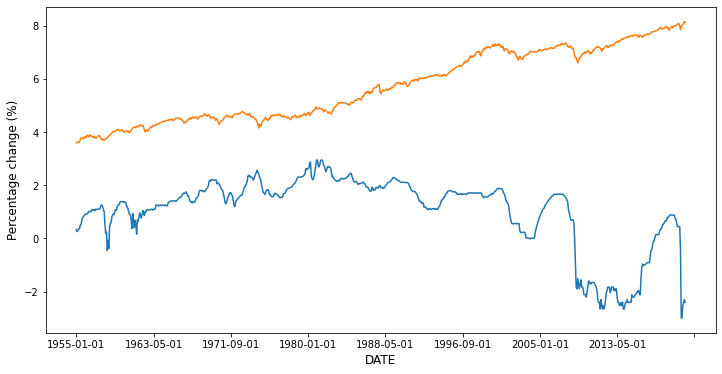

In [214]:
fig, ax2 = plt.subplots()
ax2.set_xlabel('', fontsize = 12)
ax2.set_ylabel('Percentage change (%)', fontsize = 12)
ax2 = data_merge['ln_FFR'].plot(figsize = (12,6))
data_merge['ln_S&P 500'].plot(ax = ax2)

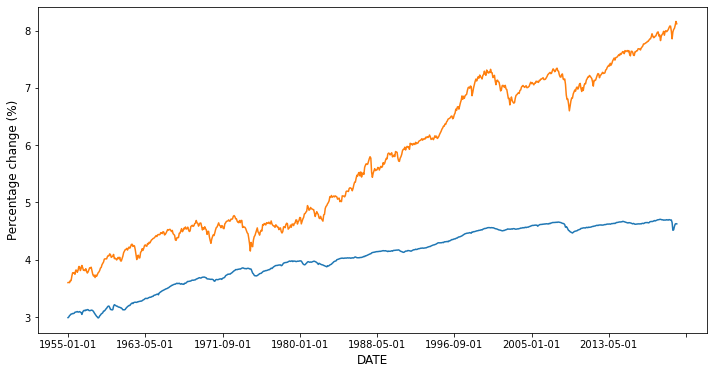

In [215]:
fig, ax3 = plt.subplots()
ax3.set_xlabel('', fontsize = 12)
ax3.set_ylabel('Percentage change (%)', fontsize = 12)
ax3 = data_merge['ln_INDPRO'].plot(figsize = (12,6))
data_merge['ln_S&P 500'].plot(ax = ax3)